<a href="https://colab.research.google.com/github/hiydavid/numerai-models/blob/main/numerai_training_eda_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerai EDA – Training Data

* by David Huang 
* updated on 2020-02-15


---
### What is Numerai?

[Numerai](https://numer.ai/) is an "open" hedge fund company that uses the wisdom of the crowd to try to deliver superior investment performance. It is essentially one, big, Kaggle competition, except a few key differences:
* It is one single competition that is ongoing with no end-date
* Prediction submissions are evaluated weekly
* Participants are ranked based on some performance metrics
* Data are all cleaned, preprocessed, and anonymised
* Participants can win **Numeraires**, a marketable cryptocurrency

What Numerai does with participant submission is that they build a massive ensemble *metamodel* that is built on top of participant's predictions. Presumably by making the submissions as input features. Their goal is to use the metalmodel to try to deliver superior investment performance. However, the performance of their hedge fund, or the metamodel itself, is no publically reported.

This notebook is my attempt to understand Numerai's data using some basic exploratory data analysis (EDA) techniques.

---
## Load libraries & datasets

### Datasets 
There are two datasets for participants to use to produce predictions: ```training``` and ```tournament```. According to Numerai's website, these datasets are updated weekly, alongside the release of the prior week's submission results.
*   `training_data` is used to train your model
*   `tournament_data` is used to make predictions with your model

In [1]:
# install numerapi
!pip install -Uqq numerapi

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import numerapi
import matplotlib.pyplot as plt

In [3]:
# download the latest training dataset (takes around 30s)
p = "https://numerai-public-datasets.s3-us-west-2.amazonaws.com/latest_numerai_training_data.csv.xz"
training = pd.read_csv(p)

In [4]:
# download the latest tournament dataset (takes around 30s)
p = "https://numerai-public-datasets.s3-us-west-2.amazonaws.com/latest_numerai_tournament_data.csv.xz"
tournament = pd.read_csv(p)

### Column descriptions
The column definitions are as follow:
*   id: a randomized id that corresponds to a stock 
*   era: a period of time
*   data_type: `train`, `validation`, `test`, or `live` 
*   feature_*: abstract financial features of the stock 
*   target: abstract measure of stock performance

For this EDA notebook, I only looked at training data. I explored the tournament data on another notebook separately.

In [5]:
# view training output
training.head()

,id,era,data_type,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,feature_intelligence8,feature_intelligence9,feature_intelligence10,feature_intelligence11,feature_intelligence12,feature_charisma1,feature_charisma2,feature_charisma3,feature_charisma4,feature_charisma5,feature_charisma6,feature_charisma7,feature_charisma8,feature_charisma9,feature_charisma10,feature_charisma11,feature_charisma12,feature_charisma13,feature_charisma14,feature_charisma15,feature_charisma16,feature_charisma17,feature_charisma18,feature_charisma19,feature_charisma20,feature_charisma21,feature_charisma22,feature_charisma23,feature_charisma24,feature_charisma25,...,feature_wisdom8,feature_wisdom9,feature_wisdom10,feature_wisdom11,feature_wisdom12,feature_wisdom13,feature_wisdom14,feature_wisdom15,feature_wisdom16,feature_wisdom17,feature_wisdom18,feature_wisdom19,feature_wisdom20,feature_wisdom21,feature_wisdom22,feature_wisdom23,feature_wisdom24,feature_wisdom25,feature_wisdom26,feature_wisdom27,feature_wisdom28,feature_wisdom29,feature_wisdom30,feature_wisdom31,feature_wisdom32,feature_wisdom33,feature_wisdom34,feature_wisdom35,feature_wisdom36,feature_wisdom37,feature_wisdom38,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46,target
0,n000315175b67977,era1,train,0.00,0.50,0.25,0.00,0.5,0.25,0.25,0.25,0.75,0.75,0.25,0.25,1.00,0.75,0.5,1.0,0.5,0.00,0.50,0.50,0.00,0.0,0.00,1.00,0.25,0.00,0.50,0.25,0.75,0.50,1.00,0.75,0.75,0.5,0.50,0.75,0.5,...,0.75,0.75,0.75,0.50,1.00,1.00,0.50,0.75,0.5,0.25,0.25,0.75,0.50,1.00,0.5,0.75,0.75,0.25,0.50,1.00,0.75,0.50,0.50,1.00,0.25,0.5,0.50,0.50,0.75,1.00,1.00,1.00,0.75,0.50,0.75,0.50,1.00,0.50,0.75,0.50
1,n0014af834a96cdd,era1,train,0.00,0.00,0.00,0.25,0.5,0.00,0.00,0.25,0.50,0.50,0.00,0.50,0.00,0.50,0.5,0.5,0.5,0.50,0.25,0.25,0.50,0.0,1.00,0.50,0.50,0.50,0.75,0.50,0.50,0.75,0.25,0.50,0.75,0.5,0.25,0.75,0.5,...,0.25,0.25,0.25,1.00,1.00,0.50,0.50,0.50,0.0,0.25,1.00,0.50,1.00,1.00,0.5,0.50,0.50,1.00,0.25,0.75,1.00,0.25,0.25,1.00,0.50,0.5,0.50,0.75,0.75,0.75,1.00,1.00,0.00,0.00,0.75,0.25,0.00,0.25,1.00,0.25
2,n001c93979ac41d4,era1,train,0.25,0.50,0.25,0.25,1.0,0.75,0.75,0.25,0.00,0.25,0.50,1.00,0.50,0.75,0.5,0.5,1.0,0.50,0.50,0.50,0.25,0.0,0.25,0.75,0.75,0.75,0.50,0.75,0.50,0.25,0.50,0.75,0.25,0.5,0.50,0.75,0.5,...,0.25,1.00,1.00,1.00,0.50,1.00,1.00,1.00,0.5,1.00,0.00,1.00,1.00,0.50,1.0,0.75,1.00,0.00,0.50,0.75,0.00,1.00,0.50,0.50,0.75,1.0,0.75,1.00,0.25,0.50,0.25,0.50,0.00,0.00,0.50,1.00,0.00,0.25,0.75,0.25
3,n0034e4143f22a13,era1,train,1.00,0.00,0.00,0.50,0.5,0.25,0.25,0.75,0.25,0.50,0.50,0.50,0.75,0.50,1.0,0.5,0.5,0.00,1.00,0.00,0.75,0.0,0.50,0.50,0.50,0.50,0.00,0.50,0.50,0.75,0.75,0.50,0.25,0.5,0.50,0.50,0.5,...,1.00,1.00,0.75,0.75,1.00,0.75,0.75,0.75,1.0,0.75,1.00,0.75,1.00,0.75,1.0,0.00,0.50,0.75,1.00,0.75,1.00,0.75,1.00,1.00,0.00,0.5,0.75,0.75,1.00,0.75,1.00,1.00,0.75,0.75,1.00,1.00,0.75,1.00,1.00,0.25
4,n00679d1a636062f,era1,train,0.25,0.25,0.25,0.25,0.0,0.25,0.50,0.25,0.25,0.50,0.25,0.25,0.75,0.50,0.0,0.5,0.5,0.25,0.00,0.50,0.00,0.5,0.25,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.75,0.50,0.25,0.5,0.50,0.50,0.5,...,1.00,0.25,0.75,1.00,0.75,0.00,0.00,0.75,0.5,1.00,0.50,0.75,0.25,0.50,0.0,0.50,0.50,0.50,0.75,0.75,0.50,0.75,0.25,0.75,0.50,0.5,0.25,0.25,0.75,0.50,0.75,0.75,0.25,0.50,0.75,0.00,0.50,0.25,0.75,0.75


In [6]:
# view tournament output
tournament.head()

,id,era,data_type,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,feature_intelligence8,feature_intelligence9,feature_intelligence10,feature_intelligence11,feature_intelligence12,feature_charisma1,feature_charisma2,feature_charisma3,feature_charisma4,feature_charisma5,feature_charisma6,feature_charisma7,feature_charisma8,feature_charisma9,feature_charisma10,feature_charisma11,feature_charisma12,feature_charisma13,feature_charisma14,feature_charisma15,feature_charisma16,feature_charisma17,feature_charisma18,feature_charisma19,feature_charisma20,feature_charisma21,feature_charisma22,feature_charisma23,feature_charisma24,feature_charisma25,...,feature_wisdom8,feature_wisdom9,feature_wisdom10,feature_wisdom11,feature_wisdom12,feature_wisdom13,feature_wisdom14,feature_wisdom15,feature_wisdom16,feature_wisdom17,feature_wisdom18,feature_wisdom19,feature_wisdom20,feature_wisdom21,feature_wisdom22,feature_wisdom23,feature_wisdom24,feature_wisdom25,feature_wisdom26,feature_wisdom27,feature_wisdom28,feature_wisdom29,feature_wisdom30,feature_wisdom31,feature_wisdom32,feature_wisdom33,feature_wisdom34,feature_wisdom35,feature_wisdom36,feature_wisdom37,feature_wisdom38,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46,target
0,n0003aa52cab36c2,era121,validation,0.25,0.75,0.50,0.50,0.0,0.75,0.5,0.25,0.50,0.5,0.25,0.0,0.25,0.50,0.25,0.00,0.25,1.00,1.00,0.25,1.00,1.00,0.25,0.25,0.0,0.50,0.25,0.75,0.00,0.50,0.25,0.25,0.25,0.50,0.00,0.50,1.00,...,0.00,0.0,0.25,0.5,0.25,0.25,0.00,0.25,0.00,0.25,0.50,0.50,0.50,0.50,0.00,0.25,0.75,0.25,0.25,0.50,0.25,0.00,0.25,0.50,0.25,0.5,0.25,0.25,1.00,0.75,0.75,0.75,1.00,0.75,0.50,0.5,1.0,0.00,0.00,0.25
1,n000920ed083903f,era121,validation,0.75,0.50,0.75,1.00,0.5,0.00,0.0,0.75,0.25,0.0,0.75,0.5,0.00,0.25,0.50,0.00,1.00,0.25,0.25,1.00,1.00,0.25,0.75,0.00,0.0,0.75,1.00,1.00,0.00,0.25,0.00,0.00,0.25,0.25,0.25,0.00,1.00,...,0.50,0.5,0.25,1.0,0.50,0.25,0.00,0.25,0.50,0.25,1.00,0.25,0.00,0.50,0.75,0.75,0.50,1.00,1.00,0.25,0.50,0.25,0.50,0.50,0.50,0.5,0.25,0.25,0.75,0.50,0.50,0.50,0.75,1.00,0.75,0.5,0.5,0.50,0.50,0.50
2,n0038e640522c4a6,era121,validation,1.00,0.00,0.00,1.00,1.0,1.00,1.0,1.00,0.50,0.5,1.00,1.0,1.00,0.75,0.50,0.50,1.00,1.00,0.50,0.50,0.00,1.00,0.50,1.00,0.5,1.00,0.50,1.00,0.25,1.00,1.00,1.00,0.50,1.00,1.00,0.75,1.00,...,0.25,0.5,0.00,0.0,0.00,0.25,0.25,0.00,0.50,0.00,0.00,0.00,0.25,0.00,0.25,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.00,0.75,0.0,0.00,0.25,0.00,0.00,0.00,0.00,0.50,0.25,0.00,0.0,0.5,0.50,0.00,1.00
3,n004ac94a87dc54b,era121,validation,0.75,1.00,1.00,0.50,0.0,0.00,0.0,0.50,0.75,1.0,0.75,0.0,0.50,0.00,0.50,0.75,0.50,0.75,0.25,0.75,0.25,0.75,0.25,0.75,1.0,0.50,0.50,0.75,0.50,1.00,0.50,0.25,0.75,0.25,0.75,0.25,0.75,...,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.25,0.00,0.25,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.75,0.00,0.00,0.25,0.25,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.0,0.0,0.25,0.25,0.50
4,n0052fe97ea0c05f,era121,validation,0.25,0.50,0.50,0.25,1.0,0.50,0.5,0.25,0.25,0.5,0.50,1.0,1.00,1.00,1.00,0.75,0.50,0.50,0.50,0.75,0.00,0.00,0.00,0.25,0.0,0.00,0.75,0.25,1.00,0.25,1.00,0.75,0.00,1.00,0.75,0.75,0.75,...,0.00,0.5,0.50,0.0,0.75,0.50,0.75,0.25,0.25,0.25,0.00,0.25,0.50,0.25,1.00,1.00,1.00,0.00,0.25,0.00,0.00,0.25,0.25,0.75,1.00,1.0,0.75,0.75,0.50,0.50,0.50,0.75,0.00,0.00,0.75,1.0,0.0,0.25,1.00,0.75


---
## Exploring training features

### Training dataset

Numerai datasets are all anonymized and scrubbed so it could be given out for free. This is what they say about the data on their [website](https://docs.numer.ai/tournament/learn):

> At the core of the Numerai Tournament is the dataset. It is made of high quality financial data that has been cleaned, regularized, and obfuscated. Each "id" corresponds to a stock at a specific time "era". The "features" describe known attributes of the stock at the time. The "target" represents an abstract measure of future performance.

I explored the training dataset and tournament dataset separately.

In [22]:
# get info
print('training data shape:', training.shape)
print('tournament data shape:', tournament.shape)

training data shape: (501808, 314)
tournament data shape: (1800934, 314)


In [19]:
# describe traiing
training.describe()

,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,feature_intelligence8,feature_intelligence9,feature_intelligence10,feature_intelligence11,feature_intelligence12,feature_charisma1,feature_charisma2,feature_charisma3,feature_charisma4,feature_charisma5,feature_charisma6,feature_charisma7,feature_charisma8,feature_charisma9,feature_charisma10,feature_charisma11,feature_charisma12,feature_charisma13,feature_charisma14,feature_charisma15,feature_charisma16,feature_charisma17,feature_charisma18,feature_charisma19,feature_charisma20,feature_charisma21,feature_charisma22,feature_charisma23,feature_charisma24,feature_charisma25,feature_charisma26,feature_charisma27,feature_charisma28,...,feature_wisdom8,feature_wisdom9,feature_wisdom10,feature_wisdom11,feature_wisdom12,feature_wisdom13,feature_wisdom14,feature_wisdom15,feature_wisdom16,feature_wisdom17,feature_wisdom18,feature_wisdom19,feature_wisdom20,feature_wisdom21,feature_wisdom22,feature_wisdom23,feature_wisdom24,feature_wisdom25,feature_wisdom26,feature_wisdom27,feature_wisdom28,feature_wisdom29,feature_wisdom30,feature_wisdom31,feature_wisdom32,feature_wisdom33,feature_wisdom34,feature_wisdom35,feature_wisdom36,feature_wisdom37,feature_wisdom38,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46,target
count,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,...,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000
mean,0.499981,0.499979,0.499979,0.499981,0.499977,0.499977,0.499977,0.499981,0.499980,0.499980,0.499981,0.499977,0.499968,0.499976,0.499974,0.499977,0.499976,0.499971,0.499974,0.499974,0.499986,0.499977,0.499979,0.499980,0.499977,0.499972,0.499974,0.499977,0.499977,0.499974,0.499968,0.499981,0.499983,0.499979,0.499977,0.499976,0.499982,0.499981,0.499976,0.499976,...,0.499982,0.499973,0.499969,0.499976,0.499971,0.499978,0.499981,0.499979,0.499979,0.499981,0.499969,0.499969,0.499981,0.499974,0.499973,0.499976,0.499974,0.499969,0.499982,0.499979,0.499974,0.499981,0.499979,0.499979,0.499976,0.499974,0.499978,0.499981,0.499982,0.499979,0.499982,0.499982,0.499974,0.499980,0.499982,0.499980,0.499974,0.499979,0.499971,0.499997
std,0.353596,0.353593,0.353593,0.353596,0.353587,0.353587,0.353587,0.353596,0.352099,0.352099,0.353596,0.353587,0.352986,0.334986,0.337437,0.338557,0.313514,0.353014,0.320992,0.291361,0.353473,0.348416,0.343023,0.343407,0.340066,0.336707,0.291361,0.337442,0.338557,0.353060,0.352986,0.343146,0.341998,0.288122,0.333733,0.334986,0.265371,0.339712,0.288295,0.344535,...,0.350824,0.353485,0.349533,0.332947,0.353419,0.344672,0.353596,0.353143,0.347689,0.353596,0.351413,0.349533,0.353596,0.348778,0.353485,0.302390,0.341651,0.351413,0.350824,0.353143,0.348778,0.353596,0.347689,0.352772,0.302390,0.341651,0.344672,0.353596,0.352151,0.352772,0.353139,0.353139,0.351328,0.350662,0.35

In [20]:
# describe tournament
tournament.describe()

,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,feature_intelligence8,feature_intelligence9,feature_intelligence10,feature_intelligence11,feature_intelligence12,feature_charisma1,feature_charisma2,feature_charisma3,feature_charisma4,feature_charisma5,feature_charisma6,feature_charisma7,feature_charisma8,feature_charisma9,feature_charisma10,feature_charisma11,feature_charisma12,feature_charisma13,feature_charisma14,feature_charisma15,feature_charisma16,feature_charisma17,feature_charisma18,feature_charisma19,feature_charisma20,feature_charisma21,feature_charisma22,feature_charisma23,feature_charisma24,feature_charisma25,feature_charisma26,feature_charisma27,feature_charisma28,...,feature_wisdom8,feature_wisdom9,feature_wisdom10,feature_wisdom11,feature_wisdom12,feature_wisdom13,feature_wisdom14,feature_wisdom15,feature_wisdom16,feature_wisdom17,feature_wisdom18,feature_wisdom19,feature_wisdom20,feature_wisdom21,feature_wisdom22,feature_wisdom23,feature_wisdom24,feature_wisdom25,feature_wisdom26,feature_wisdom27,feature_wisdom28,feature_wisdom29,feature_wisdom30,feature_wisdom31,feature_wisdom32,feature_wisdom33,feature_wisdom34,feature_wisdom35,feature_wisdom36,feature_wisdom37,feature_wisdom38,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46,target
count,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,...,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,1.800934e+06,137779.000000
mean,4.999792e-01,4.999792e-01,4.999792e-01,4.999792e-01,4.999792e-01,4.999792e-01,4.999792e-01,4.999792e-01,4.999808e-01,4.999808e-01,4.999792e-01,4.999792e-01,4.999822e-01,4.999792e-01,4.999783e-01,4.999800e-01,4.999786e-01,4.999814e-01,4.999781e-01,4.999845e-01,4.999803e-01,4.999797e-01,4.999822e-01,4.999767e-01,4.999781e-01,4.999814e-01,4.999845e-01,4.999778e-01,4.999800e-01,4.999803e-01,4.999822e-01,4.999814e-01,4.999789e-01,4.999822e-01,4.999792e-01,4.999792e-01,4.999833e-01,4.999847e-01,4.999803e-01,4.999795e-01,...,4.999828e-01,4.999803e-01,4.999811e-01,4.999772e-01,4.999847e-01,4.999814e-01,4.999792e-01,4.999811e-01,4.999781e-01,4.999792e-01,4.999822e-01,4.999811e-01,4.999792e-01,4.999781e-01,4.999803e-01,4.999839e-01,4.999800e-01,4.999822e-01,4.999828e-01,4.999811e-01,4.999781e-01,4.999792e-01,4.999781e-01,4.999797e-01,4.999839e-01,4.999800e-01,4.999814e-01,4.999792e-01,4.999825e-01,4.999797e-01,4.999775e-01,4.999775e-01,4.999811e-01,4.999783e-01,4.999825e-01,4.999772e-01,4.999811e-01,4.999781e-01,4.999847e-01,0.500015
std,3.535882e-01,3.535882e-01,3.535882e-01,3.535882e-01,3.535882e-01,3.535882e-01,3.535882e-01,3.535882e-01,3.518999e-01,3.518999e-01,3.535882e-01,3.535882e-01,3.534656e-01,3.427778e-01,3.262535e-01,3.468379e-01,3.367145e-01,3.534393e-01,3.282973e-01,3.138963e-01,3.535542e-01,3.503837e-01,3.489768e-01,3.505270e-01,3.489669e-01,3.490029e-01,3.138963e-01,3.406117e-01,3.468379e-01,3.532854e-01,3.534656e-01,3.497308e-01,3.457681e-01,3.465957

In [21]:
# view 'id'
len(training.id.unique()), len(tournament.id.unique())

(501808, 1800934)

In [10]:
# training era
training.era.unique()

array(['era1', 'era2', 'era3', 'era4', 'era5', 'era6', 'era7', 'era8',
       'era9', 'era10', 'era11', 'era12', 'era13', 'era14', 'era15',
       'era16', 'era17', 'era18', 'era19', 'era20', 'era21', 'era22',
       'era23', 'era24', 'era25', 'era26', 'era27', 'era28', 'era29',
       'era30', 'era31', 'era32', 'era33', 'era34', 'era35', 'era36',
       'era37', 'era38', 'era39', 'era40', 'era41', 'era42', 'era43',
       'era44', 'era45', 'era46', 'era47', 'era48', 'era49', 'era50',
       'era51', 'era52', 'era53', 'era54', 'era55', 'era56', 'era57',
       'era58', 'era59', 'era60', 'era61', 'era62', 'era63', 'era64',
       'era65', 'era66', 'era67', 'era68', 'era69', 'era70', 'era71',
       'era72', 'era73', 'era74', 'era75', 'era76', 'era77', 'era78',
       'era79', 'era80', 'era81', 'era82', 'era83', 'era84', 'era85',
       'era86', 'era87', 'era88', 'era89', 'era90', 'era91', 'era92',
       'era93', 'era94', 'era95', 'era96', 'era97', 'era98', 'era99',
       'era100', 'er

In [23]:
# tournament era
tournament.era.unique()

array(['era121', 'era122', 'era123', 'era124', 'era125', 'era126',
       'era127', 'era128', 'era129', 'era130', 'era131', 'era132',
       'era575', 'era576', 'era577', 'era578', 'era579', 'era580',
       'era581', 'era582', 'era583', 'era584', 'era585', 'era586',
       'era587', 'era588', 'era589', 'era590', 'era591', 'era592',
       'era593', 'era594', 'era595', 'era596', 'era597', 'era598',
       'era599', 'era600', 'era601', 'era602', 'era603', 'era604',
       'era605', 'era606', 'era607', 'era608', 'era609', 'era610',
       'era611', 'era612', 'era613', 'era614', 'era615', 'era616',
       'era617', 'era618', 'era619', 'era620', 'era621', 'era622',
       'era623', 'era624', 'era625', 'era626', 'era627', 'era628',
       'era629', 'era630', 'era631', 'era632', 'era633', 'era634',
       'era635', 'era636', 'era637', 'era638', 'era639', 'era640',
       'era641', 'era642', 'era643', 'era644', 'era645', 'era646',
       'era647', 'era648', 'era649', 'era650', 'era651', 'era6

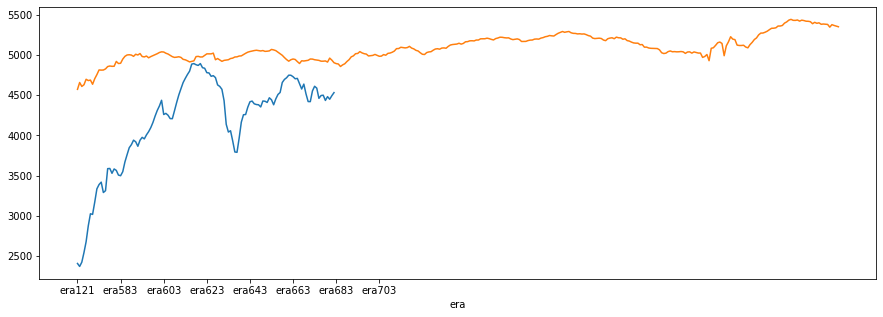

In [26]:
# plot 'era'
plt.figure(figsize = (15, 5))
training.groupby('era', sort = False).era.count().plot()
tournament.groupby('era', sort = False).era.count().plot()

In [27]:
# view 'data_type'
training.data_type.unique(), tournament.data_type.unique()

(array(['train'], dtype=object),
 array(['validation', 'test', 'live'], dtype=object))

In [28]:
# view 'target'
training.target.unique(), tournament.target.unique()

(array([0.5 , 0.25, 0.75, 0.  , 1.  ]),
 array([0.25, 0.5 , 1.  , 0.75, 0.  ,  nan]))

Ignoring the feature columns for now, a few things I noticed:
* The training data has over 500k rows and over 300 columns, most of which are features.
* The features have names like `_intelligence`, `_charisma`, `_strength`, `_dexterity`, `_constitution`, and `_wisdom`, which are all common names for character attributes in roll-playing games (RPGs). Presumably, these are some sort of performance attributes with regards to a stock.
* What's more interesting is that all the numerical data in the feature columns as well as in `target` are all 0, 0.25, 0.50, 0.75, or 1.0. I'm not sure what this means, but these are likely performance quartiles of some sort.
The modeling implication for this is that I could use regression techniques, but would have to round the results to the nearest 0.25 increments. Or, I could use classification techniques to directly predict the quartile outcomes.
* Every row is tied to a unique `id` field. And every unique `id` is tied to an `era`, which are some obscured timeframe. Since every row is unique, and they all have different timeframe, for these reasons I don't think each row is a unique stock, but rather a stock during a specific timeframe.
* These `era` timeframes go from 1 through 120. I don't know if these are days (unlikely) or quarters (more likely), but they are not of equal length. If they represent quarters, then a stock would have a max length of 30 years of performance data in the training set, which sounds somewhat reasonable.

Now, let's focus on the features.

### Features

In this section, I dive deeper into the feature columns (any column with text `feature_`).

In [ ]:
# get training data
feature_text = training.columns.str.startswith('feature')
feature_cols = training.columns[feature_text]
X = training[feature_cols]
y = training['target']

In [ ]:
# explore target
X.describe()

,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,feature_intelligence8,feature_intelligence9,feature_intelligence10,feature_intelligence11,feature_intelligence12,feature_charisma1,feature_charisma2,feature_charisma3,feature_charisma4,feature_charisma5,feature_charisma6,feature_charisma7,feature_charisma8,feature_charisma9,feature_charisma10,feature_charisma11,feature_charisma12,feature_charisma13,feature_charisma14,feature_charisma15,feature_charisma16,feature_charisma17,feature_charisma18,feature_charisma19,feature_charisma20,feature_charisma21,feature_charisma22,feature_charisma23,feature_charisma24,feature_charisma25,feature_charisma26,feature_charisma27,feature_charisma28,...,feature_wisdom7,feature_wisdom8,feature_wisdom9,feature_wisdom10,feature_wisdom11,feature_wisdom12,feature_wisdom13,feature_wisdom14,feature_wisdom15,feature_wisdom16,feature_wisdom17,feature_wisdom18,feature_wisdom19,feature_wisdom20,feature_wisdom21,feature_wisdom22,feature_wisdom23,feature_wisdom24,feature_wisdom25,feature_wisdom26,feature_wisdom27,feature_wisdom28,feature_wisdom29,feature_wisdom30,feature_wisdom31,feature_wisdom32,feature_wisdom33,feature_wisdom34,feature_wisdom35,feature_wisdom36,feature_wisdom37,feature_wisdom38,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46
count,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,...,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000
mean,0.499981,0.499979,0.499979,0.499981,0.499977,0.499977,0.499977,0.499981,0.499980,0.499980,0.499981,0.499977,0.499968,0.499976,0.499974,0.499977,0.499976,0.499971,0.499974,0.499974,0.499986,0.499977,0.499979,0.499980,0.499977,0.499972,0.499974,0.499977,0.499977,0.499974,0.499968,0.499981,0.499983,0.499979,0.499977,0.499976,0.499982,0.499981,0.499976,0.499976,...,0.499975,0.499982,0.499973,0.499969,0.499976,0.499971,0.499978,0.499981,0.499979,0.499979,0.499981,0.499969,0.499969,0.499981,0.499974,0.499973,0.499976,0.499974,0.499969,0.499982,0.499979,0.499974,0.499981,0.499979,0.499979,0.499976,0.499974,0.499978,0.499981,0.499982,0.499979,0.499982,0.499982,0.499974,0.499980,0.499982,0.499980,0.499974,0.499979,0.499971
std,0.353596,0.353593,0.353593,0.353596,0.353587,0.353587,0.353587,0.353596,0.352099,0.352099,0.353596,0.353587,0.352986,0.334986,0.337437,0.338557,0.313514,0.353014,0.320992,0.291361,0.353473,0.348416,0.343023,0.343407,0.340066,0.336707,0.291361,0.337442,0.338557,0.353060,0.352986,0.343146,0.341998,0.288122,0.333733,0.334986,0.265371,0.339712,0.288295,0.344535,...,0.352542,0.350824,0.353485,0.349533,0.332947,0.353419,0.344672,0.353596,0.353143,0.347689,0.353596,0.351413,0.349533,0.353596,0.348778,0.353485,0.302390,0.341651,0.351413,0.350824,0.353143,0.348778,0.353596,0.347689,0.352772,0.302390,0.341651,0.344672,0.353596,0.352151,0.352772,0.353139,0.353139,0.35

In [ ]:
# feature attirbute types
feature_intellignce = X.columns[X.columns.str.startswith('feature_intelligence')]
feature_charisma = X.columns[X.columns.str.startswith('feature_charisma')]
feature_strength = X.columns[X.columns.str.startswith('feature_strength')]
feature_dexterity = X.columns[X.columns.str.startswith('feature_dexterity')]
feature_constitution = X.columns[X.columns.str.startswith('feature_constitution')]
feature_wisdom = X.columns[X.columns.str.startswith('feature_wisdom')]

X_intelligence = X[feature_intellignce]
X_charisma = X[feature_charisma]
X_strength = X[feature_strength]
X_dexterity = X[feature_dexterity]
X_constitution = X[feature_constitution]
X_wisdom = X[feature_wisdom]

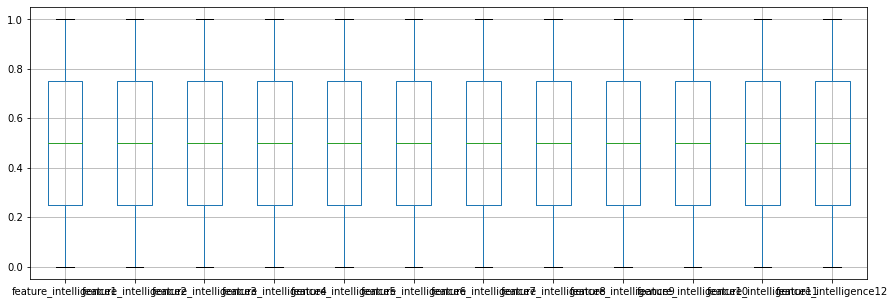

In [ ]:
# plot distribution (intelligence)
plt.figure(figsize = (15, 5))
X_intelligence.boxplot()

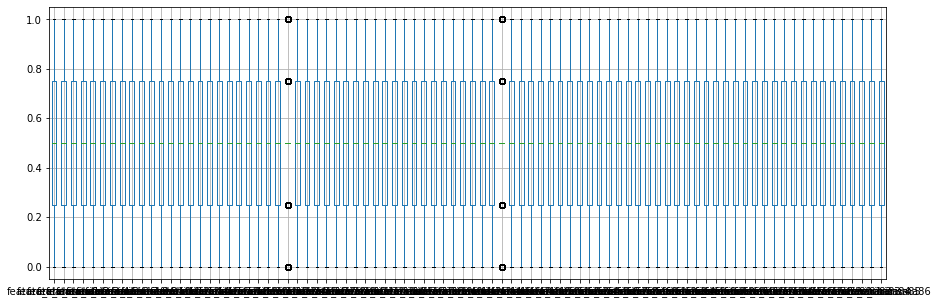

In [ ]:
# plot distribution (charisma)
plt.figure(figsize = (15, 5))
X_charisma.boxplot()

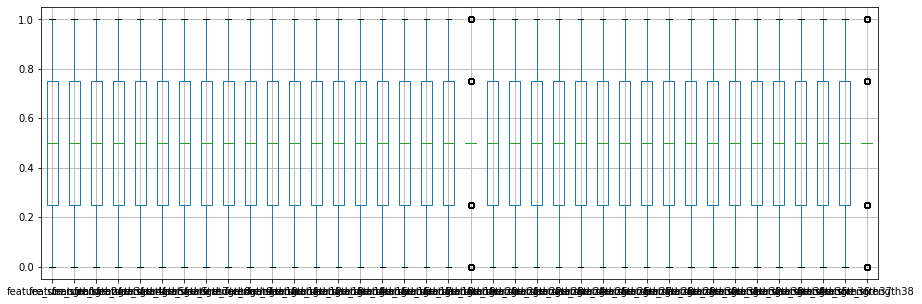

In [ ]:
# plot distribution (strength)
plt.figure(figsize = (15, 5))
X_strength.boxplot()

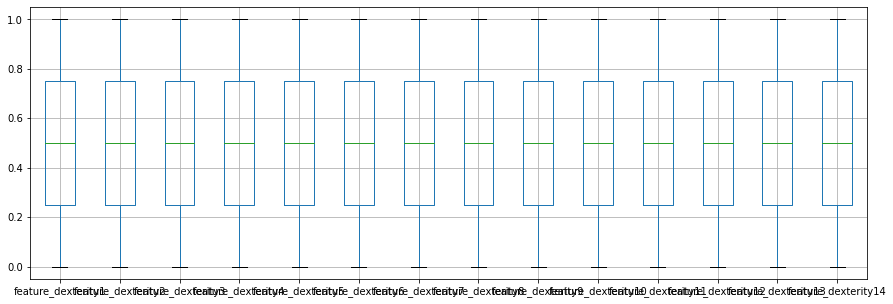

In [ ]:
# plot distribution (dexterity)
plt.figure(figsize = (15, 5))
X_dexterity.boxplot()

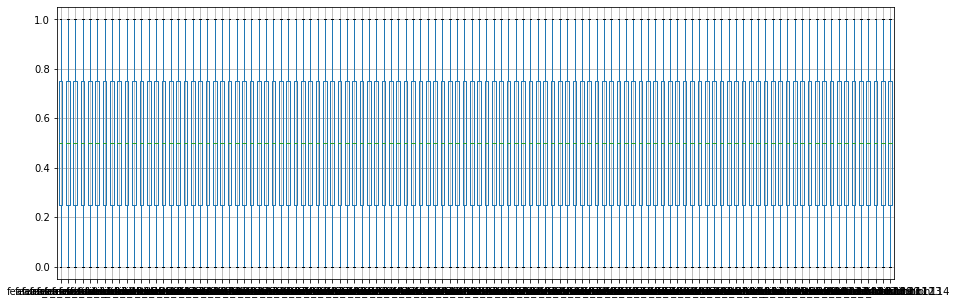

In [ ]:
# plot distribution (constitution)
plt.figure(figsize = (15, 5))
X_constitution.boxplot()

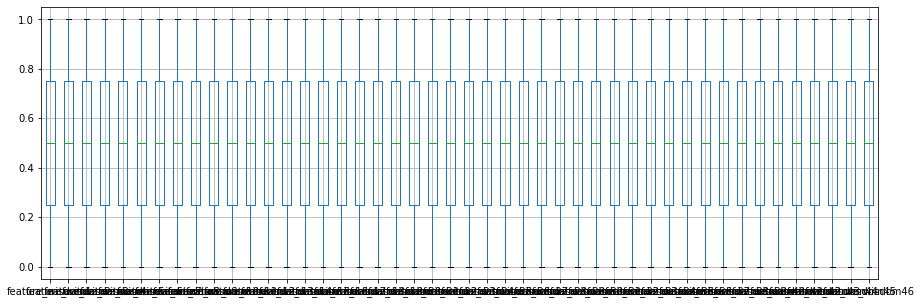

In [ ]:
# plot distribution (wisdom)
plt.figure(figsize = (15, 5))
X_wisdom.boxplot()

It is pretty obvious from the dataset that the features were normalized and standardized before the release, which resulted in the what is shown above.

### Target

In [ ]:
y.describe()

count    501808.000000
mean          0.499997
std           0.223268
min           0.000000
25%           0.500000
50%           0.500000
75%           0.500000
max           1.000000
Name: target, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3195111ba8>]],
      dtype=object)

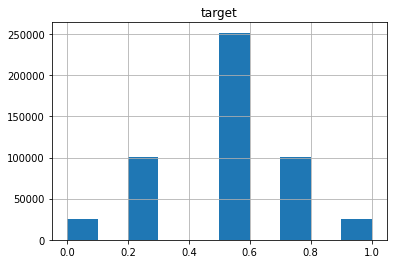

In [ ]:
pd.DataFrame(y).hist()

Looks like the same thing was done here for the target as well. Not much more to do here.